
https://en.wikipedia.org/wiki/Messier_object



In [114]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

def parse_data(df):
    df = df[[
        'parallax',
        'phot_g_mean_mag',
        'phot_bp_mean_mag',
        'phot_rp_mean_mag',
        'distance_gspphot'
    ]].rename(columns={
        'parallax': 'parallax_marcs',
        'phot_g_mean_mag' : 'mg',
        'phot_bp_mean_mag': 'mb',
        'phot_rp_mean_mag': 'mr',
        'distance_gspphot': 'distance_parsec'
    })
    df.dropna(inplace=True)
    return df

df_m6 = parse_data(pd.read_csv('m6.csv'))
df_m26 = parse_data(pd.read_csv("m26.csv"))
df_m6

,parallax_marcs,mg,mb,mr,distance_parsec
49,0.759467,16.793848,17.698300,15.770948,1771.3733
51,0.476602,18.099812,19.416370,16.940105,675.8917
58,0.302318,17.609333,20.439476,16.056032,1140.1256
59,0.550210,18.307657,19.401731,17.360718,612.1261
64,0.541993,17.973038,19.569977,16.771896,1694.3456
...,...,...,...,...,...
1977,0.702514,17.942677,19.109888,16.713500,733.2036
1993,0.485829,15.434588,15.968355,14.545371,984.9202
1994,1.766789,10.392164,10.508675,10.162863,618.6493
1995,0.248174,15.816823,17.621393,14.534911,4233.6733


In [127]:
def calculate_color_and_magnitude(df):
    df['color_index'] = df['mb'] - df['mr']
    df['parallax_arc'] = df['parallax_marcs'] / 1000
    df['distance_par'] = 1 / df['parallax_arc']
    df['M'] = df['mg'] - 5 * np.log10(df['distance_par']) + 5
    return df

df_m6 = calculate_color_and_magnitude(df_m6)
df_m26 = calculate_color_and_magnitude(df_m26)
df_m6.head(5)

/Users/pmcslarrow/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,parallax_marcs,mg,mb,mr,distance_parsec,color_index,parallax_arc,distance_par,M
49,0.759467,16.793848,17.698300,15.770948,1771.3733,1.927352,0.000759,1316.713150,6.196392
51,0.476602,18.099812,19.416370,16.940105,675.8917,2.476265,0.000477,2098.186891,6.490591
58,0.302318,17.609333,20.439476,16.056032,1140.1256,4.383444,0.000302,3307.779636,5.011650
59,0.550210,18.307657,19.401731,17.360718,612.1261,2.041013,0.000550,1817.489408,7.010298
64,0.541993,17.973038,19.569977,16.771896,1694.3456,2.798081,0.000542,1845.041069,6.643008


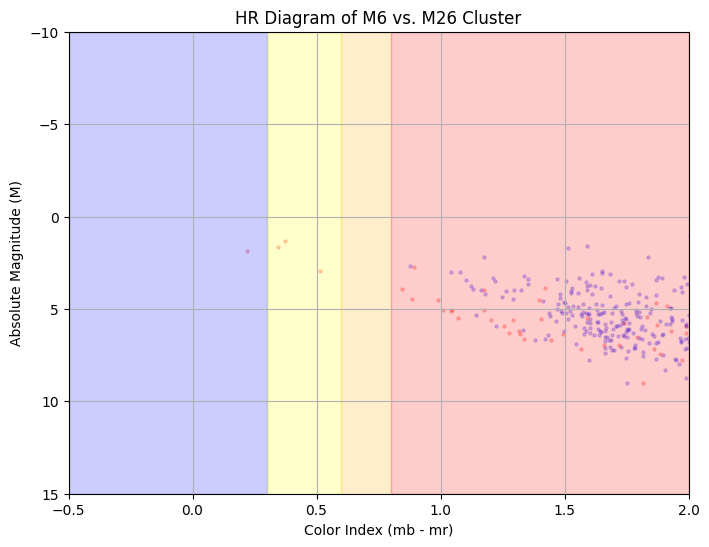

In [132]:
color_index = np.linspace(-0.5, 2.0, 100)
def absolute_magnitude(color_index):
    return 5 * np.log10(color_index + 1) + 5
absolute_mag = absolute_magnitude(color_index)
#plt.plot(color_index, absolute_mag, '-')


plt.figure(figsize=(8, 6))
plt.scatter(df_m6['color_index'], df_m6['M'], s=5, c='red', alpha=0.2)
plt.scatter(df_m26['color_index'], df_m26['M'], s=5, c='blue', alpha=0.2)
plt.xlabel('Color Index (mb - mr)')
plt.ylabel('Absolute Magnitude (M)')
plt.title('HR Diagram of M6 vs. M26 Cluster')
plt.grid(True)
plt.xlim(-0.5, 2.0)
plt.ylim(15, -10)
plt.fill_between([-0.5, 0.3], -10, 15, color='blue', alpha=0.2)
plt.fill_between([0.3, 0.6], -10, 15, color='yellow', alpha=0.2)
plt.fill_between([0.6, 0.8], -10, 15, color='orange', alpha=0.2)
plt.fill_between([0.8, 2.0], -10, 15, color='red', alpha=0.2)
plt.show()
